In [1]:
from urllib.request import urlopen
import json as json
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## ETL USA

In [2]:
#importamos la informacion a traves de la API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&orderby=time"
df_usa= pd.read_csv(url)
pd.set_option('display.max_columns', None)

In [95]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11548 non-null  object 
 1   latitude         11548 non-null  float64
 2   longitude        11548 non-null  float64
 3   depth            11548 non-null  float64
 4   mag              11548 non-null  float64
 5   magType          11548 non-null  object 
 6   nst              8322 non-null   float64
 7   gap              8322 non-null   float64
 8   dmin             6128 non-null   float64
 9   rms              11548 non-null  float64
 10  net              11548 non-null  object 
 11  id               11548 non-null  object 
 12  updated          11548 non-null  object 
 13  place            11281 non-null  object 
 14  type             11548 non-null  object 
 15  horizontalError  7661 non-null   float64
 16  depthError       11547 non-null  float64
 17  magError    

In [3]:
def transformacion_usa(df):
    #elimino columnas innecesarias
    df= df.drop(columns=['magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id','updated','type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource'])
    #coloco todos los registros en minusculas
    df= df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    #Vamos a redondear las columnas de variables float
    df[['latitude','longitude','depth','mag']]=df[['latitude','longitude','depth','mag']].round(1)
    #eliminamos duplicados
    df= df.drop_duplicates()
    #agrego una columna "country" con el nombre del pais respectivo en caso que necesite identificar en procesos posteriores
    df['country']='usa'

    #cambiamos el formato de fecha para estandarizarla junto con los otros datasets
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    return df

In [4]:
df_usa= transformacion_usa(df_usa)

In [212]:
df_usa

,time,latitude,longitude,depth,mag,place,country
0,2023-05-16 18:03:17,32.8,-115.6,11.1,1.6,"3km nw of el centro, ca",usa
1,2023-05-16 18:00:57,35.6,-117.6,12.4,0.8,"12km e of ridgecrest, ca",usa
2,2023-05-16 17:59:49,38.8,-122.8,2.3,1.1,"7km nw of the geysers, ca",usa
3,2023-05-16 17:57:08,62.3,-149.6,38.4,1.7,"22 km ne of susitna north, alaska",usa
4,2023-05-16 17:52:34,19.4,-155.2,3.4,2.0,"3 km s of volcano, hawaii",usa
...,...,...,...,...,...,...,...
11503,2023-04-16 18:50:41,58.2,-155.3,2.6,-0.2,"85 km nw of karluk, alaska",usa
11504,2023-04-16 18:49:39,58.2,-155.3,2.2,-0.0,"86 km nw of karluk, alaska",usa
11505,2023-04-16 18:47:08,38.8,-122.8,2.1,0.5,"7km nw of the geysers, ca",usa
11506,2023-04-16 18:42:04,36.7,-116.3,7.5,0.4,"47 km ese of beatty, nevada",usa


## ETL Japon

In [5]:
#importamos los datos
url = "https://www.jma.go.jp/bosai/quake/data/list.json"
response = requests.get(url)
data = response.json()
df_japon = pd.DataFrame(data)

In [76]:
df_japon.head()

,ctt,eid,rdt,ttl,ift,ser,at,anm,acd,cod,mag,maxi,int,json,en_ttl,en_anm
0,20230516015000,20230516014645,2023-05-16T01:50:00+09:00,震源・震度情報,発表,1,2023-05-16T01:46:00+09:00,トカラ列島近海,798,+30.0+129.9-10000/,2.8,2,"[{'code': '46', 'maxi': '2', 'city': [{'code':...",20230516015000_20230516014645_VXSE5k_1.json,Earthquake and Seismic Intensity Information,Adjacent Sea of Tokara Islands
1,20230516013833,20230516013442,2023-05-16T01:38:00+09:00,震源・震度情報,発表,1,2023-05-16T01:34:00+09:00,トカラ列島近海,798,+29.9+130.1-10000/,3.3,3,"[{'code': '46', 'maxi': '3', 'city': [{'code':...",20230516013833_20230516013442_VXSE5k_1.json,Earthquake and Seismic Intensity Information,Adjacent Sea of Tokara Islands
2,20230516013737,20230516013442,2023-05-16T01:37:00+09:00,震源に関する情報,発表,0,2023-05-16T01:34:00+09:00,トカラ列島近海,798,+29.9+130.1-10000/,3.3,,[],20230516013737_20230516013442_VXSE52_0.json,Earthquake Information,Adjacent Sea of Tokara Islands
3,20230516013612,20230516013442,2023-05-16T01:36:00+09:00,震度速報,発表,0,2023-05-16T01:34:00+09:00,,,,,3,"[{'code': '46', 'maxi': '3', 'city': []}]",20230516013612_20230516013442_VXSE51_0.json,Seismic Intensity Information,
4,20230515223941,20230515223608,2023-05-15T22:39:00+09:00,震源・震度情報,発表,1,2023-05-15T22:36:00+09:00,トカラ列島近海,798,+29.8+129.9+0/,2.8,2,"[{'code': '46', 'maxi': '2', 'city': [{'code':...",20230515223941_20230515223608_VXSE5k_1.json,Earthquake and Seismic Intensity Information,Adjacent Sea of Tokara Islands


In [6]:
def transformacion_japon(df):
    #eliminamos las columnas que no vamos a utilizar
    df= df.drop(columns=['ctt','eid','rdt','ttl','ift','ser','anm','acd','maxi','int','json','en_ttl'])
    #eliminamos y/o reemplazamos caracateres innecesarios
    df['cod'] = df['cod'].str.replace('+', '', 1) # Esta linea de codigo reemplaza exclusivamente el primer '+'
    df['cod'] = df['cod'].str.replace('+', ',')
    df['cod'] = df['cod'].str.replace('-', ',')
    df['cod'] = df['cod'].str.replace('/', '')

    #ahora que esta limpio podemos separar los datos
    df = df.join(df['cod'].str.split(',', expand=True).rename(columns={0:'latitude', 1:'longitude', 2:'depth'}))
    df = df.drop(columns='cod')

    #convertimos a float la columna "depth"
    df['depth'] = df['depth'].astype('float64')
    #dividimos por mil para llevar la unidad de medida a KM para mantener la misma en todos los datasets
    df['depth'] = (df['depth'] / 1000)

    #renombramos columnas
    df = df.rename(columns={'at': 'time', 'en_anm': 'place'})
    #reordenamos columnas
    orden = ['time', 'latitude', 'longitude', 'depth', 'mag', 'place']
    df = df[orden]

    #todo a minusculas
    df=df.applymap(lambda x: x.lower() if isinstance(x,str) else x)
    #agrego una columna "country" con el nombre del pais respectivo en caso que necesite identificar en procesos posteriores
    df['country']='japon'

    #Vamos a redondear las columnas de variables float
    df[['latitude','longitude','depth','mag']]=df[['latitude','longitude','depth','mag']].round(1)

    #reemplazamos los "ｍ不明" ("desconocido en español") de la columna "mag" por NaN
    df['mag'] = df['mag'].replace({'ｍ不明': np.nan, '': np.nan})

    #eliminamos duplicados
    df= df.drop_duplicates()
    
    #substituimos los Nones por NaN
    df['longitude'] = df['longitude'].replace({None: np.nan, '': np.nan})
    df['latitude'] = df['latitude'].replace({None: np.nan, '': np.nan})
    df['depth'] = df['depth'].replace({None: np.nan, '': np.nan})

    #cambiamos el formato de fecha para estandarizarla junto con los otros datasets
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

    #elimino los registos nulos pero solo aquellos que son nulos en todas las columnas
    df = df.dropna(subset=['latitude', 'longitude', 'depth', 'mag','place'], how='all')
    
    #pasamos a string
    df['depth'] = df['depth'].astype('object')
    #solo necesito el ultimo
    df=df.head(1)
    
    return df

In [7]:
df_japon= transformacion_japon(df_japon)

/var/folders/_5/spzfhw090m5dhqvxrw9qgsbr0000gn/T/ipykernel_60259/2078036198.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cod'] = df['cod'].str.replace('+', '', 1) # Esta linea de codigo reemplaza exclusivamente el primer '+'
/var/folders/_5/spzfhw090m5dhqvxrw9qgsbr0000gn/T/ipykernel_60259/2078036198.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cod'] = df['cod'].str.replace('+', ',')


In [8]:
df_japon.head()

,time,latitude,longitude,depth,mag,place,country
0,2023-05-18 19:49:00,37.5,137.3,10.0,3.6,"noto, ishikawa prefecture",japon


## ETL Chile

In [9]:
#traemos la informacion a traves de la API
url = "https://api.xor.cl/sismo/recent"

response = requests.get(url)
data = response.json()
df_chile = pd.DataFrame(data)
df_chile

,status_code,status_description,events
0,0,Información obtenida satisfactoriamente,"{'id': '197580', 'url': 'http://sismologia.cl/..."
1,0,Información obtenida satisfactoriamente,"{'id': '197571', 'url': 'http://sismologia.cl/..."
2,0,Información obtenida satisfactoriamente,"{'id': '197566', 'url': 'http://sismologia.cl/..."
3,0,Información obtenida satisfactoriamente,"{'id': '197557', 'url': 'http://sismologia.cl/..."
4,0,Información obtenida satisfactoriamente,"{'id': '197540', 'url': 'http://sismologia.cl/..."
5,0,Información obtenida satisfactoriamente,"{'id': '197533', 'url': 'http://sismologia.cl/..."
6,0,Información obtenida satisfactoriamente,"{'id': '197531', 'url': 'http://sismologia.cl/..."
7,0,Información obtenida satisfactoriamente,"{'id': '197522', 'url': 'http://sismologia.cl/..."
8,0,Información obtenida satisfactoriamente,"{'id': '197515', 'url': 'http://sismologia.cl/..."
9,0,Información obtenida satisfactoriamente,"{'id': '197506', 'url': 'http://sismologia.cl/..."


In [81]:
#Veamos que caracteristicas tienen las columnas
df_chile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   status_code         59 non-null     int64 
 1   status_description  59 non-null     object
 2   events              59 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [10]:
def transformacion_chile(df):
    #Elminamos las columnas innecesarias y nos quedamos solo con la columna "events"
    df= df.drop(columns=['status_code','status_description'])

    #Extraemos la informacion y la adjuntamos al dataframe como nuevas columnas
    df['time']= df['events'].apply(lambda x : x['utc_date'])
    df['latitude']= df['events'].apply(lambda x : x['latitude'])
    df['longitude']=df['events'].apply(lambda x: x['longitude'])
    df['depth']=df['events'].apply(lambda x: x['depth'])
    df['mag']=df['events'].apply(lambda x: x['magnitude']['value'])
    df['place']=df['events'].apply(lambda x: x['geo_reference'])

    #Eliminamos la columna "events", ahora ya no la necesitamos
    df= df.drop(columns=['events'])

    #Pasamos todo a minusculas
    df= df.applymap(lambda x : x.lower() if isinstance(x,str) else x)
    #Agrego una columna "country" con el nombre del pais respectivo en caso que necesite identificar en procesos posteriores
    df['country']= 'chile'

    #convertimos el tipo de la columna "depth" a float para mantener la misma estructura en todos los datasets
    df['depth']= df['depth'].astype('Float64')
    #eliminamos duplicados
    df= df.drop_duplicates()
    #Vamos a redondear las columnas de variables float
    df[['latitude','longitude','depth','mag']]=df[['latitude','longitude','depth','mag']].round(1)

    #cambiamos el formato de fecha para estandarizarla junto con los otros datasets
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    #solo necesito el ultimo
    df=df.head(1)
    
    return df

In [11]:
df_chile= transformacion_chile(df_chile)

In [12]:
df_chile

,time,latitude,longitude,depth,mag,place,country
0,2023-05-18 12:47:38,-32.4,-71.3,39.0,3.2,6 km al o de la ligua,chile


## Machine Learning

Kmeans

In [13]:
from sklearn.cluster import KMeans

In [14]:
#separamos los campos que quiero para ejecutar el modelo
X= df_usa[['depth','mag']]

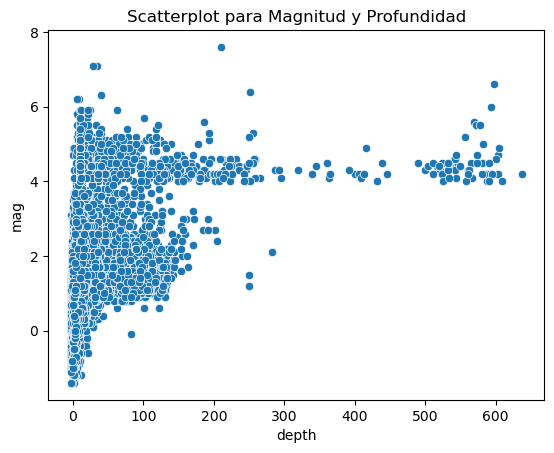

In [16]:
sns.scatterplot(x= X['depth'],y= X['mag'])
plt.title('Scatterplot para Magnitud y Profundidad')
plt.show()

In [23]:
#seleccionamos el modelo
kmeans= KMeans(n_clusters=4, random_state=0)

In [24]:
#entrenamos el modelo
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [25]:
#vemos las etiquetas y los centroides
etiquetas= kmeans.labels_
centroides= kmeans.cluster_centers_

In [26]:
#comprobamos la estiquetas
etiquetas

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [27]:
#comprobamos los centroides
centroides

array([[  8.83518537,   1.3845981 ],
       [525.25      ,   4.46285714],
       [ 73.73935837,   1.98200313],
       [142.02239468,   2.66829268]])

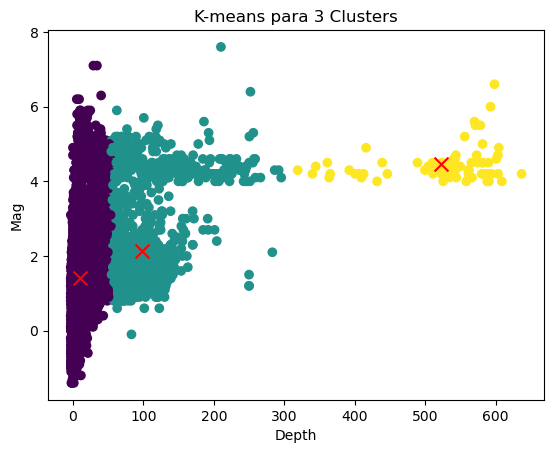

In [22]:
# Graficamos las muestras y los clústeres asignados
plt.scatter(X['depth'], X['mag'], c=etiquetas, cmap='viridis')
# Graficar los centroides de los clústeres
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', color='red', s=100)
plt.xlabel('Depth')
plt.ylabel('Mag')
plt.title('K-means para 3 Clusters')
plt.show()

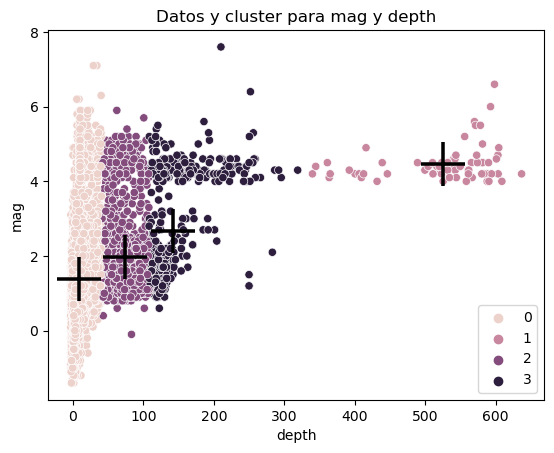

In [28]:
# Vemos si se ve mejor en Seaborn
sns.scatterplot(x= X['depth'], y= X['mag'], hue = etiquetas)
sns.scatterplot(x = centroides[:, 0], y = centroides[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y cluster para mag y depth')
plt.show()

In [29]:
#Agregamos las etiqeutas al dataset
X['etiquetas']= etiquetas

/var/folders/_5/spzfhw090m5dhqvxrw9qgsbr0000gn/T/ipykernel_60259/693377710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['etiquetas']= etiquetas


In [30]:
#comprobamos si estan correctamente agreagadas
X.head(25)

,depth,mag,etiquetas
0,11.1,0.7,0
1,20.0,1.1,0
2,28.6,0.5,0
3,3.4,0.5,0
4,2.0,0.8,0
5,5.4,0.8,0
6,5.9,0.8,0
7,62.8,0.6,2
8,0.0,1.9,0
9,5.2,1.1,0


In [31]:
#comprobamos si estan todas y cuantos registros contienen cada etiqueta
print(X['etiquetas'].value_counts())

0    9787
2    1276
3     457
1      70
Name: etiquetas, dtype: int64


In [32]:
#verificamos la cantidad optima de clusters a traves del metodo del codo, donde "inertia"= valor de los errores
rango= range(1,10)
error= []
for i in rango:
    kmeans= KMeans(n_clusters= i).fit(X)
    error.append(kmeans.inertia_)
    

In [33]:
#controlamos los errores
error

[31669167.07356336,
 13864453.626996275,
 3756595.0774398823,
 2377888.7176459813,
 1446544.6816710783,
 983614.4469494376,
 751004.4696983154,
 583588.4192490489,
 448164.998969274]

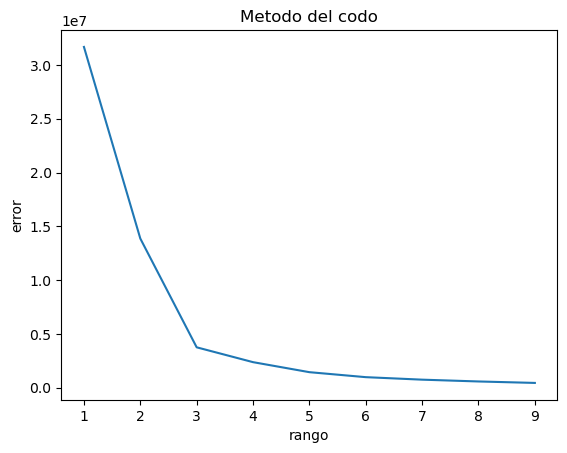

In [35]:
#graficamos para poder observar mejor
plt.plot(rango,error)
plt.xlabel('rango')
plt.ylabel('error')
plt.title('Metodo del codo')
plt.show()

 BDSCAN

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
#separamos los campos que quiero para ejecutar el modelo
X= df_usa[['depth','mag']]

In [38]:
#Llamamos al modelo DBSCAN
dbscan= DBSCAN(eps=0.5, min_samples=10)

In [39]:
#Lo entrenamos
dbscan.fit(X)

DBSCAN(min_samples=10)

In [40]:
#consultamos las etiquetas del modelo, el numero de clusters y el ruido
etiquetas= dbscan.labels_
clusters= len(set(etiquetas)) - (1 if -1 in etiquetas else 0 )
ruido_indices = [i for i, etiqueta in enumerate(etiquetas) if etiqueta == -1]

In [41]:
#controlamos las etiquetas
etiquetas

array([ 0,  0, -1, ...,  0,  0,  0])

In [42]:
X['etiquetas_dbscan']= etiquetas

/var/folders/_5/spzfhw090m5dhqvxrw9qgsbr0000gn/T/ipykernel_60259/3165236214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['etiquetas_dbscan']= etiquetas


In [43]:
#comprobamos si estan todas y cuantos registros contienen cada etiqueta
print(X['etiquetas_dbscan'].value_counts())

 0     9405
-1     1245
 13     182
 12      96
 5       55
 6       54
 4       42
 14      39
 16      36
 7       35
 21      33
 19      32
 3       32
 1       29
 8       27
 10      26
 11      26
 22      22
 2       20
 18      19
 9       17
 15      16
 17      16
 23      15
 20      15
 24      14
 26      13
 25      10
 28      10
 27       9
Name: etiquetas_dbscan, dtype: int64


In [44]:
#ahora los clusters
clusters

29

In [45]:
#numero de ruidos
print(list(etiquetas).count(-1))

1245


In [46]:
#ahora el ruido
ruido_indices

[2,
 7,
 17,
 20,
 26,
 28,
 31,
 33,
 34,
 36,
 37,
 39,
 41,
 46,
 48,
 50,
 60,
 61,
 66,
 69,
 72,
 100,
 106,
 128,
 144,
 155,
 158,
 162,
 164,
 173,
 177,
 179,
 184,
 195,
 201,
 222,
 257,
 265,
 303,
 306,
 316,
 329,
 336,
 342,
 377,
 381,
 393,
 414,
 432,
 440,
 446,
 447,
 466,
 467,
 483,
 490,
 505,
 508,
 511,
 515,
 569,
 585,
 587,
 598,
 602,
 604,
 609,
 650,
 654,
 657,
 662,
 664,
 671,
 674,
 683,
 684,
 693,
 711,
 722,
 754,
 757,
 762,
 786,
 789,
 814,
 816,
 824,
 837,
 843,
 853,
 858,
 862,
 877,
 898,
 904,
 911,
 922,
 928,
 929,
 937,
 949,
 954,
 958,
 960,
 961,
 968,
 971,
 1001,
 1018,
 1029,
 1035,
 1042,
 1057,
 1064,
 1068,
 1071,
 1074,
 1085,
 1088,
 1104,
 1107,
 1111,
 1124,
 1126,
 1134,
 1135,
 1142,
 1144,
 1149,
 1170,
 1184,
 1185,
 1195,
 1205,
 1206,
 1207,
 1208,
 1222,
 1235,
 1250,
 1255,
 1258,
 1260,
 1269,
 1270,
 1288,
 1294,
 1324,
 1335,
 1370,
 1373,
 1378,
 1390,
 1397,
 1401,
 1405,
 1438,
 1447,
 1466,
 1487,
 1501,
 15

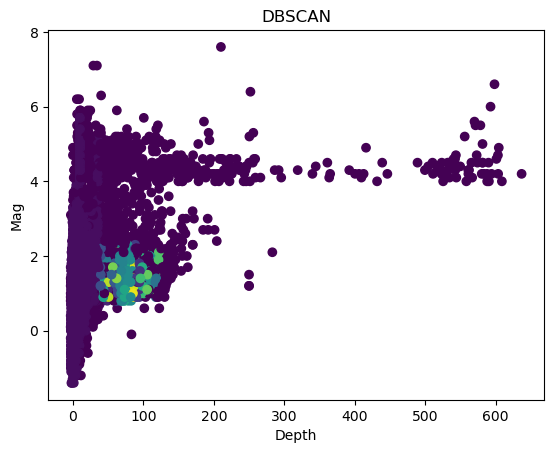

In [48]:
# Graficar las muestras y los clústeres asignados
plt.scatter(X['depth'], X['mag'], c=etiquetas, cmap='viridis')
plt.xlabel('Depth')
plt.ylabel('Mag')
plt.title('DBSCAN')
plt.show()

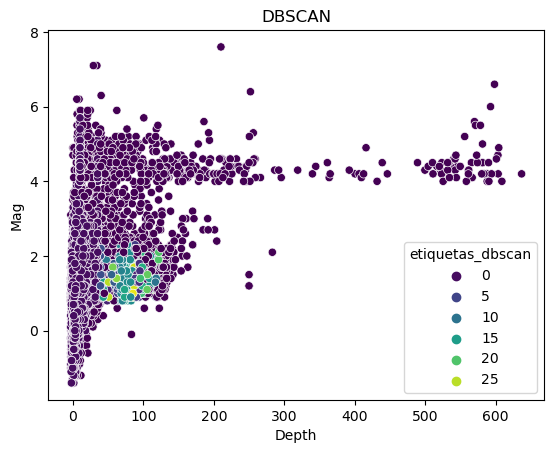

In [49]:
# Graficar las muestras y los clústeres asignados
sns.scatterplot(data=X, x='depth', y='mag', hue='etiquetas_dbscan', palette='viridis')
plt.xlabel('Depth')
plt.ylabel('Mag')
plt.title('DBSCAN')
plt.show()

## Final

In [233]:
df_final= pd.concat([df_japon,df_chile,df_usa])

In [234]:
df_final

,time,latitude,longitude,depth,mag,place,country
0,2023-05-17 00:34:00,29.9,130.0,10.0,3.0,adjacent sea of tokara islands,japon
0,2023-05-16 17:38:51,-17.8,-69.8,141.0,3.2,42 km al so de visviri,chile
0,2023-05-16 18:03:17,32.8,-115.6,11.1,1.6,"3km nw of el centro, ca",usa
1,2023-05-16 18:00:57,35.6,-117.6,12.4,0.8,"12km e of ridgecrest, ca",usa
2,2023-05-16 17:59:49,38.8,-122.8,2.3,1.1,"7km nw of the geysers, ca",usa
...,...,...,...,...,...,...,...
11503,2023-04-16 18:50:41,58.2,-155.3,2.6,-0.2,"85 km nw of karluk, alaska",usa
11504,2023-04-16 18:49:39,58.2,-155.3,2.2,-0.0,"86 km nw of karluk, alaska",usa
11505,2023-04-16 18:47:08,38.8,-122.8,2.1,0.5,"7km nw of the geysers, ca",usa
11506,2023-04-16 18:42:04,36.7,-116.3,7.5,0.4,"47 km ese of beatty, nevada",usa


In [235]:
from sklearn.cluster import KMeans
def etiquetado (df):
    #separamos los campos que quiero para ejecutar el modelo
    X= df[['depth','mag']]
    X= X.dropna()
    #seleccionamos el modelo
    kmeans= KMeans(n_clusters=4, random_state=0)
    #entrenamos el modelo
    kmeans.fit(X)
    #traigo las etiquetas
    etiquetas= kmeans.labels_
    #Agregamos las etiquetas al dataset
    df['etiquetas']= etiquetas
    df=df.reset_index()
    df=df.head(3)
    if df['etiquetas']== 2:
        df['etiquetas'].replace('2','leve')
    elif df['etiquetas']== 3:
        df['etiquetas'].replace('3','medio')
    elif df['etiquetas']== 1:
        df['etiquetas'].replace('1','alto')
    return df

In [236]:
from sklearn.cluster import KMeans

def etiquetado(df):
    # Separamos los campos que queremos para ejecutar el modelo
    X = df[['depth', 'mag']]
    X = X.dropna()
    
    # Seleccionamos el modelo
    kmeans = KMeans(n_clusters=4, random_state=0)
    
    # Entrenamos el modelo
    kmeans.fit(X)
    
    # Traemos las etiquetas
    etiquetas = kmeans.labels_
    
    # Agregamos las etiquetas al dataset
    df['etiquetas'] = etiquetas
    
    # Reemplazamos los valores de las etiquetas por 'leve', 'medio' y 'alto'
    df['etiquetas'].replace({2: 'leve', 3: 'medio', 1: 'alto'}, inplace=True)
    
    # Seleccionamos solo las primeras 3 filas
    df = df.head(3)
    
    # Reemplazamos los valores de las etiquetas específicos dentro del DataFrame
    df.loc[df['etiquetas'] == 'leve', 'etiquetas'] = 'leve'
    df.loc[df['etiquetas'] == 'medio', 'etiquetas'] = 'medio'
    df.loc[df['etiquetas'] == 'alto', 'etiquetas'] = 'alto'
    
    return df


In [237]:
df_final=etiquetado(df_final)

In [238]:
df_final

,time,latitude,longitude,depth,mag,place,country,etiquetas
0,2023-05-17 00:34:00,29.9,130.0,10.0,3.0,adjacent sea of tokara islands,japon,0
0,2023-05-16 17:38:51,-17.8,-69.8,141.0,3.2,42 km al so de visviri,chile,alto
0,2023-05-16 18:03:17,32.8,-115.6,11.1,1.6,"3km nw of el centro, ca",usa,0


In [134]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level_0    3 non-null      int64 
 1   index      3 non-null      int64 
 2   time       3 non-null      object
 3   latitude   3 non-null      object
 4   longitude  3 non-null      object
 5   depth      3 non-null      object
 6   mag        3 non-null      object
 7   place      3 non-null      object
 8   country    3 non-null      object
 9   etiquetas  3 non-null      int32 
dtypes: int32(1), int64(2), object(7)
memory usage: 356.0+ bytes
